## Extraction

In [23]:
import pandas as pd
import requests
import json
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [24]:
euro_real_raw = requests.get("https://economia.awesomeapi.com.br/json/daily/EUR-BRL/180")

In [25]:
euro_real_json = euro_real_raw.json()

## Manipulation

In [26]:
euro_real_df = pd.DataFrame(euro_real_json)[["high", "low", "timestamp"]]

In [27]:
euro_real_df["timestamp"] = euro_real_df["timestamp"].astype("int")

In [28]:
euro_real_df["high"] = euro_real_df["high"].astype("float")

In [29]:
euro_real_df["low"] = euro_real_df["low"].astype("float")

In [30]:
euro_real_df["date"] = pd.to_datetime(euro_real_df["timestamp"], unit="s", origin = "unix")

In [31]:
euro_real_df["date"] = euro_real_df["date"].dt.date

In [32]:
euro_real_df = euro_real_df.drop(columns = ["timestamp"])

In [33]:
euro_real_df["price"] = (euro_real_df["high"] + euro_real_df["low"]) / 2

In [34]:
euro_real_df = euro_real_df.iloc[:,2:]

In [35]:
euro_real_df = euro_real_df.sort_values(by = "date", ascending = True)

In [36]:
def rolling_avg_var_x_days(df, n_days):
    col_name_avg = "avg_last_" + str(n_days) + "_days"
    df[col_name_avg] = df["price"].rolling(window = n_days).mean()
    col_name_var = "var_today_avg_last_" + str(n_days) + "_days"
    df[col_name_var] = (df["price"] - df[col_name_avg])
    df = df.sort_index()
    df = df.dropna()
    return df

In [37]:
euro_real_df = rolling_avg_var_x_days(euro_real_df, 15)

In [38]:
euro_real_df.head()

,date,price,avg_last_15_days,var_today_avg_last_15_days
0,2024-04-05,5.4727,5.413010,0.059690
1,2024-04-04,5.4732,5.408563,0.064637
2,2024-04-03,5.4619,5.405863,0.056037
3,2024-04-02,5.4476,5.406117,0.041483
4,2024-04-01,5.3848,5.406590,-0.021790


In [39]:
euro_real_df = euro_real_df.sort_values(by = "date", ascending = True)

In [40]:
def rolling_min_var_x_days(df, n_days):
    col_name_min = "min_last_" + str(n_days) + "_days"
    df[col_name_min] = df["price"].rolling(window = n_days).min()
    col_name_var = "var_today_min_last_" + str(n_days) + "_days"
    df[col_name_var] = (df["price"] - df[col_name_min])
    df = df.sort_index()
    df = df.dropna()
    return df

In [41]:
euro_real_df = rolling_min_var_x_days(euro_real_df, 15)

In [42]:
euro_real_df.head()

,date,price,avg_last_15_days,var_today_avg_last_15_days,min_last_15_days,var_today_min_last_15_days
0,2024-04-05,5.4727,5.413010,0.059690,5.3848,0.0879
1,2024-04-04,5.4732,5.408563,0.064637,5.3848,0.0884
2,2024-04-03,5.4619,5.405863,0.056037,5.3848,0.0771
3,2024-04-02,5.4476,5.406117,0.041483,5.3848,0.0628
4,2024-04-01,5.3848,5.406590,-0.021790,5.3848,0.0000


In [43]:
euro_real_df["is_best_price_last_15_days"] = np.where(euro_real_df.price == euro_real_df.min_last_15_days, 1, 0)

In [181]:
euro_real_df["price"] = round(euro_real_df["price"], 2)

## Visualisation

''

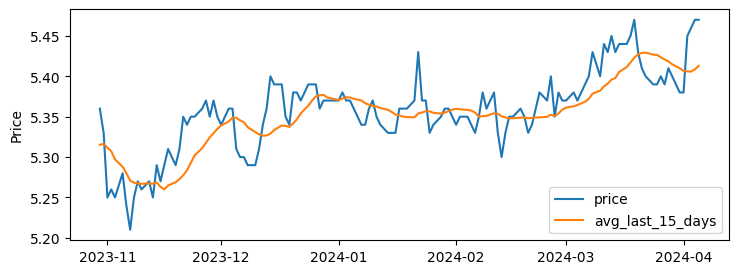

In [182]:
price_avg_df = euro_real_df[["date", "price", "avg_last_15_days"]].melt(value_vars = ["price", "avg_last_15_days"], id_vars = "date")
plt.figure(figsize = (8.5, 3))
sns.lineplot(data = price_avg_df, x = "date", y = "value", hue = "variable")
plt.ylabel("Price")
plt.xlabel("")
plt.legend(title = "", loc = "lower right")
;

''

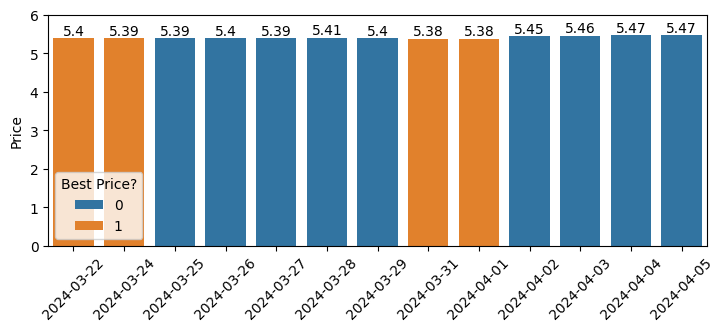

In [225]:
data_seg = euro_real_df.head(15)
data_seg = data_seg.sort_values("date")
plt.figure(figsize = (8.5, 3))
ax = sns.barplot(data = data_seg, x = "date", y = "price", hue = "is_best_price_last_15_days")
ax.legend(title = "Best Price?", loc = "lower left")
plt.bar_label(ax.containers[0], fontsize = 10)
plt.bar_label(ax.containers[1], fontsize = 10)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Price")
plt.ylim(0, 6)
;